## Observations and Insights 

In [93]:
# Setup dependencies and libraries to solve 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Create paths to each data file
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mice_data = pd.read_csv(mouse_metadata_path)
results_data = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(mice_data, results_data)
mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [94]:
# Checking the number of mice in the DataFrame
count_mice = len(mice_df["Mouse ID"].unique())
count_mice

249

In [95]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = mice_df.loc[mice_df['Timepoint']==0]['Mouse ID'].value_counts()
duplicated_mice

g989    2
o926    1
s565    1
p189    1
a411    1
       ..
w150    1
o813    1
q597    1
t994    1
y793    1
Name: Mouse ID, Length: 249, dtype: int64

In [96]:
duplicated_mice_ID = duplicated_mice.loc[duplicated_mice != 1]
duplicated_mice_ID

g989    2
Name: Mouse ID, dtype: int64

In [97]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated_mouse_ID = mice_df.loc[mice_df['Mouse ID'] == 'g989']
all_duplicated_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID using .loc[]
cleaned_mice_df = mice_df.loc[mice_df['Mouse ID'] != 'g989']
cleaned_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [99]:
# Checking the number of mice in the clean DataFrame.
count_cleaned_mice_df = len(cleaned_mice_df['Mouse ID'].unique())
count_cleaned_mice_df

248

## Summary Statistics

I will use two different methods of generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen. 

In [100]:
# The 1st method is the most straightforward, creating multiple series and putting them all together at the end.

# To make things more readable - I first created a groupby as Drug Regimen
drug_reg_gbdf = cleaned_mice_df.groupby(['Drug Regimen'])
drug_reg_gbdf

In [101]:
# Mean of each Drug Regimen
mean_tumor_volume = drug_reg_gbdf.mean()
mean_df = pd.DataFrame(mean_tumor_volume['Tumor Volume (mm3)'])
mean_data = mean_df.rename(columns={"Tumor Volume (mm3)":'Mean of Tumor Volume (mm3)'})
mean_data

,Mean of Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [102]:
# Median of each Drug Regimen 
median_tumor_volume = drug_reg_gbdf.median()
median_df = pd.DataFrame(median_tumor_volume['Tumor Volume (mm3)'])
median_data = median_df.rename(columns={"Tumor Volume (mm3)":'Median of Tumor Volume (mm3)'})
median_data

,Median of Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [103]:
# Variance of each Drug Regimen 
var_tumor_volume = drug_reg_gbdf.var()
var_df = pd.DataFrame(var_tumor_volume['Tumor Volume (mm3)'])
var_data = var_df.rename(columns={"Tumor Volume (mm3)":'Var of Tumor Volume (mm3)'})
var_data

,Var of Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [104]:
# Standard Deviation of each Drug Regimen 
std_tumor_volume = drug_reg_gbdf.std()
std_df = pd.DataFrame(std_tumor_volume['Tumor Volume (mm3)'])
std_data = std_df.rename(columns={"Tumor Volume (mm3)":'Std of Tumor Volume (mm3)'})
std_data

,Std of Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [105]:
# SEM of each Drug Regimen 
sem_tumor_volume = drug_reg_gbdf.sem()
sem_df = pd.DataFrame(sem_tumor_volume['Tumor Volume (mm3)'])
sem_data = sem_df.rename(columns={"Tumor Volume (mm3)":'SEM of Tumor Volume (mm3)'})
sem_data

,SEM of Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [106]:
# pd.concat([s1, s2], axis=1).reset_index()
indv_stat_regimen_ccdf = pd.concat([mean_data, median_data, var_data, std_data, sem_data], axis=1)
indv_stat_regimen_ccdf

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Var of Tumor Volume (mm3),Std of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using df.groupby().agg()
# This method produces everything in a single groupby function
summary_stat_regimen_ccdf = drug_reg_gbdf.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stat_regimen_ccdf

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

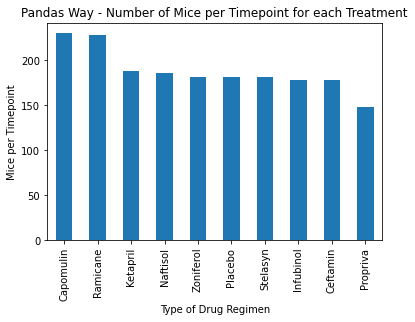

In [108]:
# Using pandas, generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study

num_treatment = cleaned_mice_df['Drug Regimen'].value_counts()

bar_chart_pd = num_treatment.plot(kind="bar",
             title= "Pandas Way - Number of Mice per Timepoint for each Treatment", 
             xlabel="Type of Drug Regimen",
             ylabel ="Mice per Timepoint")

# display
plt.show()

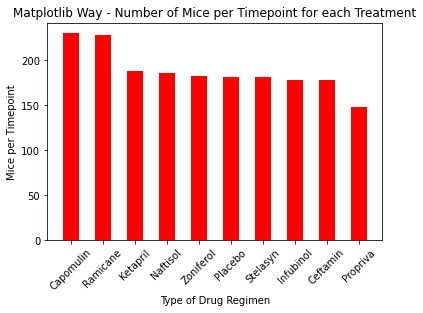

In [109]:
# Using Matplotlib, generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study

plt.bar(
    x=num_treatment.index.values,
    height=num_treatment.values,
    width=0.5,
    color='red' 
)

# create labels
plt.xticks(rotation=45)
plt.title("Matplotlib Way - Number of Mice per Timepoint for each Treatment")
plt.xlabel("Type of Drug Regimen")
plt.ylabel("Mice per Timepoint")

# display
plt.show()

## Pie Plots

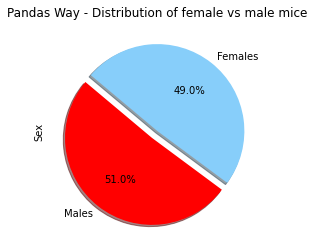

In [110]:
# Using pandas, generate a pie plot showing the distribution of female versus male mice

sex_distribution = cleaned_mice_df['Sex'].value_counts()

pie_chart_pd = sex_distribution.plot.pie(
             labels=["Males","Females"],
             explode=[0.1, 0],
             colors = ["red", "lightskyblue"],
             autopct='%1.1f%%',
             shadow=True,
             startangle=140,
             title= "Pandas Way - Distribution of female vs male mice",
             ylabel ="Sex")

# display
plt.show()

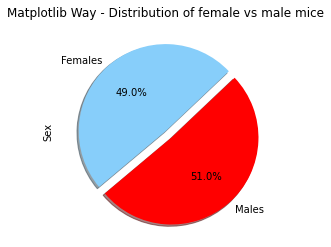

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(
    sex_distribution,
    labels=["Males","Females"], 
    explode=[0.1, 0], 
    colors = ["red", "lightskyblue"],
    autopct='%1.1f%%',
    shadow=True,
    startangle=220)

# labels
plt.title("Matplotlib Way - Distribution of female vs male mice")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [112]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Find the four of the most promising treatment regimens: smallest final tumor volume for each Mouse ID
min_tumor_data = cleaned_mice_df.loc[cleaned_mice_df.min(axis=1).sort_values().index, :]
min_tumor_data.head(10)

# Conclusion: (1) Ramicane (2) Placebo (3) Propriva (4) Stelasyn

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
951,i477,Placebo,Female,3,30,5,46.657385,0
953,i635,Propriva,Male,21,26,0,45.000000,0
954,i635,Propriva,Male,21,26,5,47.235937,0
963,i669,Placebo,Female,18,27,0,45.000000,0
969,i901,Stelasyn,Male,23,29,0,45.000000,0
970,i901,Stelasyn,Male,23,29,5,46.493024,0
971,i901,Stelasyn,Male,23,29,10,50.421250,0
972,i901,Stelasyn,Male,23,29,15,51.419642,0
973,i901,Stelasyn,Male,23,29,20,55.974405,0


In [114]:
# Separate Tumor Volume (mm3) and Drug Regimen from the rest of the data

promising_regimens_df = cleaned_mice_df[["Drug Regimen", "Tumor Volume (mm3)"]]
promising_regimens_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [143]:
# The four of the promising regimens 

ramicane = promising_regimens_df.loc[promising_regimens_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
placebo = promising_regimens_df.loc[promising_regimens_df["Drug Regimen"] == "Placebo"]['Tumor Volume (mm3)']
propriva = promising_regimens_df.loc[promising_regimens_df["Drug Regimen"] == "Propriva"]['Tumor Volume (mm3)']
stelasyn = promising_regimens_df.loc[promising_regimens_df["Drug Regimen"] == "Stelasyn"]['Tumor Volume (mm3)']

In [144]:
# Ramincane quartiles 

ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = inf_upperq-inf_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f"The lower quartile of occupancy is: {ram_lowerq}")
print(f"The upper quartile of occupancy is: {ram_upperq}")
print(f"The interquartile range of occupancy is: {ram_iqr}")
print(f"The the median of occupancy is: {ram_quartiles[0.5]} ")
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of occupancy is: 36.67463458499999
The upper quartile of occupancy is: 45.0
The interquartile range of occupancy is: 0.0
The the median of occupancy is: 40.67323554 
Values below 36.67463458499999 could be outliers.
Values above 45.0 could be outliers.


In [145]:
# Placebo outliers

pla_quartiles = placebo.quantile([.25,.5,.75])
pla_lowerq = pla_quartiles[0.25]
pla_upperq = pla_quartiles[0.75]
pla_iqr = pla_upperq-pla_lowerq
pla_lower_bound = pla_lowerq - (1.5*pla_iqr)
pla_upper_bound = pla_upperq + (1.5*pla_iqr)

print(f"The lower quartile of occupancy is: {pla_lowerq}")
print(f"The upper quartile of occupancy is: {pla_upperq}")
print(f"The interquartile range of occupancy is: {pla_iqr}")
print(f"The the median of occupancy is: {pla_quartiles[0.5]} ")
print(f"Values below {pla_lower_bound} could be outliers.")
print(f"Values above {pla_upper_bound} could be outliers.")

The lower quartile of occupancy is: 47.459052899999996
The upper quartile of occupancy is: 59.91693443
The interquartile range of occupancy is: 12.457881530000002
The the median of occupancy is: 52.28893409 
Values below 28.772230604999994 could be outliers.
Values above 78.603756725 could be outliers.


In [146]:
# Propriva outliers

pro_quartiles = propriva.quantile([.25,.5,.75])
pro_lowerq = pro_quartiles[0.25]
pro_upperq = pro_quartiles[0.75]
pro_iqr = pro_upperq-pro_lowerq
pro_lower_bound = pro_lowerq - (1.5*pro_iqr)
pro_upper_bound = pro_upperq + (1.5*pro_iqr)

print(f"The lower quartile of occupancy is: {pro_lowerq}")
print(f"The upper quartile of occupancy is: {pro_upperq}")
print(f"The interquartile range of occupancy is: {pro_iqr}")
print(f"The the median of occupancy is: {pro_quartiles[0.5]} ")
print(f"Values below {pro_lower_bound} could be outliers.")
print(f"Values above {pro_upper_bound} could be outliers.")

The lower quartile of occupancy is: 46.8943284525
The upper quartile of occupancy is: 56.491585465
The interquartile range of occupancy is: 9.597257012500002
The the median of occupancy is: 50.446266345 
Values below 32.49844293375 could be outliers.
Values above 70.88747098375 could be outliers.


In [147]:
# Stelasyn outliers

ste_quartiles = stelasyn.quantile([.25,.5,.75])
ste_lowerq = ste_quartiles[0.25]
ste_upperq = ste_quartiles[0.75]
ste_iqr = ste_upperq-ste_lowerq
ste_lower_bound = ste_lowerq - (1.5*ste_iqr)
ste_upper_bound = ste_upperq + (1.5*ste_iqr)

print(f"The lower quartile of occupancy is: {ste_lowerq}")
print(f"The upper quartile of occupancy is: {ste_upperq}")
print(f"The interquartile range of occupancy is: {ste_iqr}")
print(f"The the median of occupancy is: {ste_quartiles[0.5]} ")
print(f"Values below {ste_lower_bound} could be outliers.")
print(f"Values above {ste_upper_bound} could be outliers.")

The lower quartile of occupancy is: 48.04713882
The upper quartile of occupancy is: 58.7192973
The interquartile range of occupancy is: 10.67215848
The the median of occupancy is: 52.43173664 
Values below 32.038901100000004 could be outliers.
Values above 74.72753502 could be outliers.


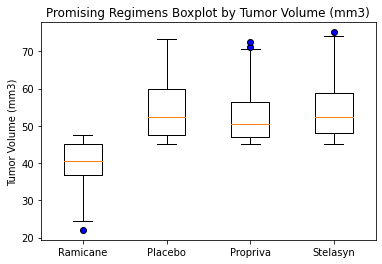

In [152]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

promising_regimens_boxplot = dict(markerfacecolor='blue')
plt.boxplot([ramicane,placebo,propriva,stelasyn],labels=['Ramicane','Placebo','Propriva','Stelasyn'],flierprops=promising_regimens_boxplot)
plt.title("Promising Regimens Boxplot by Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

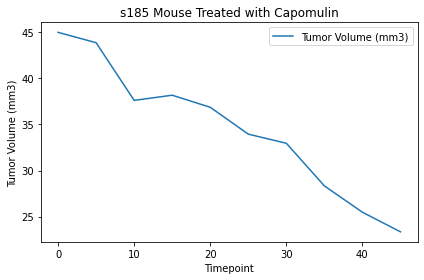

In [156]:
# Generate a line plot of time point versus tumor volume for a mouse (s185 mouse) treated with Capomulin

capomulin_data = cleaned_mice_df.loc[cleaned_mice_df["Drug Regimen"] == "Capomulin"]
s185_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185"]
s185_mouse_df = s185_mouse[["Timepoint","Tumor Volume (mm3)"]].set_index("Timepoint")

# plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
pie_chart_pd = s185_mouse_df.plot.line()

# create labels
plt.title("s185 Mouse Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

# display
plt.tight_layout()
plt.show()

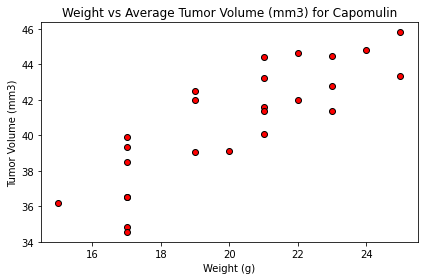

In [154]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_data = cleaned_mice_df.loc[cleaned_mice_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_data.groupby("Mouse ID").mean()

plt.scatter(
    capomulin_df['Weight (g)'],
    capomulin_df['Tumor Volume (mm3)'],
    marker='o',
    facecolors='red',
    edgecolors='black'
)

# create labels
plt.title("Weight vs Average Tumor Volume (mm3) for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# display
plt.tight_layout()
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708721


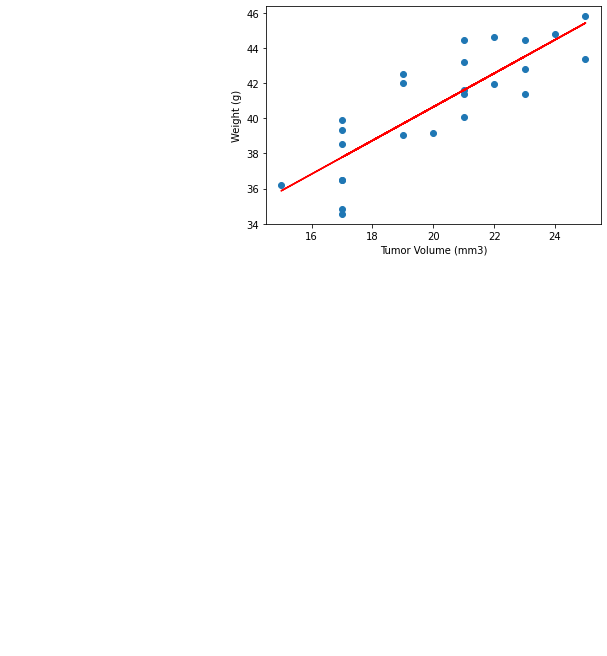

In [37]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Create the x and y values for the correlation and regression
x_values = Capomulin_df['Weight (g)']
y_values = Capomulin_df['Tumor Volume (mm3)']

# Plot the correction and regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create labels
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

# display
print(f"The r-squared is: {rvalue**2}")
plt.show()